In [9]:
import TurbPy as tb
from TurbPy.imports import *

In [10]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_400ppc_500int/'
# deck = 'KH_400ppc_200wci/'
deck = 'turb2/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))

In [11]:
sp = 'electron'

In [17]:
time_step = 353
path = dirs + 'filter_hdf5/' + f'T.{time_step}'

# he_file = h5py.File(path + "/hydro_" + species + "_"+str(time_step)+".h5", 'r')
field_file = h5py.File(path + "/fields_" + str(time_step)+".h5", 'r')

jvec={}
var_dict = {}
vars = ['cbx']
group=field_file['T_353']

for i in vars:
    dset = group[i]
    jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
    dset.read_direct(jvec[i+str(time_step)])
    var_dict[i] = np.array(dset[:,:,0])

KeyError: "Unable to open object (object 'cbx' doesn't exist)"

In [ ]:
def load_cbx(dirs, time_step, species = 'electron'):
    path = dirs + 'filter_hdf5/' + f'T.{time_step}'
    
    # he_file = h5py.File(path + "/hydro_" + species + "_"+str(time_step)+".h5", 'r')
    field_file = h5py.File(path + "/fields_" + str(time_step)+".h5", 'r')
    
    jvec={}
    var_dict = {}
    vars = ['cbx']
    group=field_file['cbx']

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,0])
    return (var_dict)

In [ ]:
load_cbx(dirs, 0)

ValueError: Field names only allowed for compound types

In [ ]:
def load_fil(dirs, time_step, species = 'electron'):
    path = dirs + 'filter_hdf5/' + f'T.{time_step}/'
    
    he_file = h5py.File(path + "/hydro_" + species + "_"+str(time_step)+".h5", 'r')
    field_file = h5py.File(path + "/fields_" + str(time_step)+".h5", 'r')
    
    jvec={}
    var_dict = {}
    vars = ['cbx', 'cby', 'cbz', 'ex', 'ey', 'ez']
    group=field_file['Timestep_'+str(time_step)]

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,0])

    jvec={}
    vars = ['jxe', 'jye', 'jze', 'kee', 'pxe', 'pye', 'pze', 
            'rhoe', 'txxe', 'txye', 'tyye', 'tyze', 'tzxe', 'tzze']
    group=he_file['Timestep_'+str(time_step)]

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,0])

    jvec={}
    vars = ['jxi', 'jyi', 'jzi', 'kei', 'pxi', 'pyi', 'pzi', 
            'rhoi', 'txxi', 'txyi', 'tyyi', 'tyzi', 'tzxi', 'tzzi']
    group=he_file['Timestep_'+str(time_step)]

    for i in vars:
        dset = group[i]
        jvec[i+str(time_step)] = np.zeros(dset.shape, dtype=dset.dtype)
        dset.read_direct(jvec[i+str(time_step)])
        var_dict[i] = np.array(dset[:,:,0])
    return (var_dict)

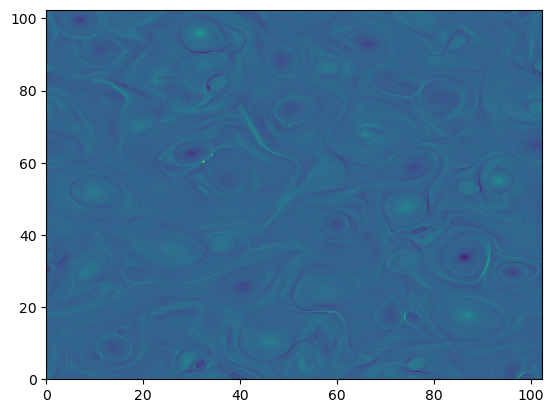

In [ ]:
t = times[10]
ds = load_fil(dirs, t, species = sp)
plt.pcolormesh(ly, lx, ds['jz'])

In [ ]:
t = 1000
ds1 = tb.load_vars(dirs, t, species = sp)
t = 73000
ds2 = tb.load_vars(dirs, t, species = sp)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/pscratch/sd/g/goodwill/turb2/hydro_hdf5/T.1000/hydro_electron_1000.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
print(ds1['jz'][:,0])
print(ds2['jz'][:,0])

[-8.5879234e-05  9.9674799e-04  6.5633655e-03 ... -1.9853525e-03
  3.5569954e-04 -3.5065515e-03]
[ 0.00969532  0.00360511  0.00481438 ...  0.00541898  0.00049785
 -0.00961946]
